In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os

In [ ]:
comments=pd.read_csv('/content/UScomments.csv',error_bad_lines=False)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
from textblob import TextBlob

In [ ]:
comments.dropna(inplace=True)

In [ ]:
polarity=[] # list which will contain the polarity of the comments

for i in comments['comment_text']:
    polarity.append(TextBlob(i).sentiment.polarity)

comments['polarity']=polarity

comments.head(20)


,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.000000
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.000000
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.000000
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.000000
4,XpVt6Z1Gjjo,trending 😉,3,0,0.000000
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0,0.000000
6,XpVt6Z1Gjjo,The end though 😭👍🏻❤️,4,0,0.000000
7,XpVt6Z1Gjjo,#1 trending!!!!!!!!!,3,0,0.000000
8,XpVt6Z1Gjjo,Happy one year vlogaversary,3,0,0.800000
9,XpVt6Z1Gjjo,You and your shit brother may have single hand...,0,0,-0.135714


In [ ]:
comments_positive=comments[comments['polarity']==1]

comments_positive.shape

comments_positive.head()

,video_id,comment_text,likes,replies,polarity
64,XpVt6Z1Gjjo,yu are the best,1,0,1.0
156,cLdxuaxaQwc,Power is the disease. Care is the cure. Keep...,0,0,1.0
227,WYYvHb03Eog,YAS Can't wait to get it! I just need to sell ...,0,0,1.0
307,sjlHnJvXdQs,This is priceless,0,0,1.0
319,sjlHnJvXdQs,Summed up perfectly,0,0,1.0


(-0.5, 999.5, 499.5, -0.5)

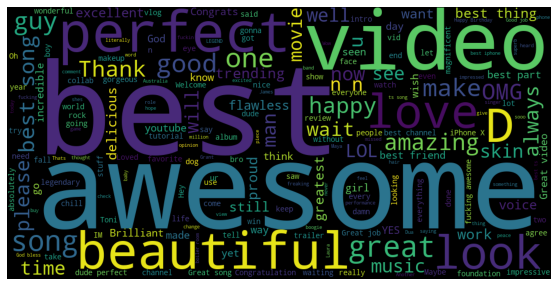

In [ ]:
from wordcloud import WordCloud,STOPWORDS

stopwords=set(STOPWORDS)

total_comments=' '.join(comments_positive['comment_text'])

wordcloud=WordCloud(width=1000,height=500,stopwords=stopwords).generate(total_comments)

plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

(-0.5, 999.5, 499.5, -0.5)

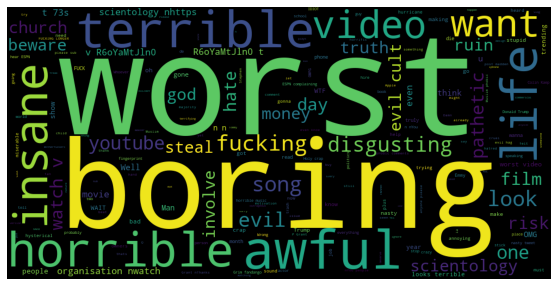

In [ ]:
comments_negative=comments[comments['polarity']==-1]

total_comments=' '.join(comments_negative['comment_text'])

wordcloud=WordCloud(width=1000,height=500,stopwords=stopwords).generate(total_comments)

plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

In [ ]:
import re
re.compile('<title>(.*)</title>')

re.compile(r'<title>(.*)</title>', re.UNICODE)

In [ ]:
videos=pd.read_csv('/content/USvideos.csv',error_bad_lines=False)
videos.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\nSkipping line 5297: expected 11 fields, saw 12\nSkipping line 5299: expected 11 fields, saw 12\nSkipping line 5300: expected 11 fields, saw 12\nSkipping line 5301: expected 11 fields, saw 12\n'


,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
0,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09
1,K4wEI5zhHB0,iPhone X — Introducing iPhone X — Apple,Apple,28,Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...,7860119,185853,26679,0,https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg,13.09
2,cLdxuaxaQwc,My Response,PewDiePie,22,[none],5845909,576597,39774,170708,https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg,13.09
3,WYYvHb03Eog,Apple iPhone X first look,The Verge,28,apple iphone x hands on|Apple iPhone X|iPhone ...,2642103,24975,4542,12829,https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg,13.09
4,sjlHnJvXdQs,iPhone X (parody),jacksfilms,23,jacksfilms|parody|parodies|iphone|iphone x|iph...,1168130,96666,568,6666,https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg,13.09


In [ ]:
tags_complete=' '.join(videos['tags'])
tags_complete


"logan paul vlog|logan paul|logan|paul|olympics|logan paul youtube|vlog|daily|comedy|hollywood|parrot|maverick|bird|maverick clothes|diamond play button|logan paul diamond play button|10M subscribers|logan paul 1 year vlogging|1 year vlog|dwarf mamba play button|logan paul history|youtube history|10M|10M plaque|youtube button|diamond button|logang|logang 4 life Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lighting|A11 Bionic|augmented reality|emoji|animoji|Face ID|Apple Pay|camera|smartphone [none] apple iphone x hands on|Apple iPhone X|iPhone X|apple iphone x first look|iPhone X first look|apple iphone x event 2017|apple iphone x event|iPhone X price|iPhone X specs|iPhone X design|iPhone X camera|iPhone X home button|iPhone X wireless charging|iPhone X waterproof|iPhone X release date|iphone 2017|apple|iphone|ios 11|the verge|verge jacksfilms|parody|parodies|iphone|iphone x|iphone 8|apple|emoji a24|a24 films|a24 trailers|independent films|trailer|HD|official|movie|film|a24 movies|oscar 

(-0.5, 999.5, 499.5, -0.5)

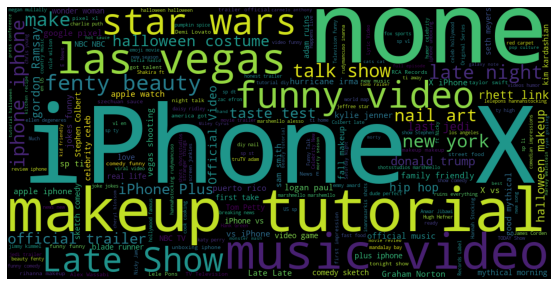

In [ ]:
wordcloud=WordCloud(width=1000,height=500,stopwords=set(STOPWORDS)).generate(tags_complete)

plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

Text(0.5, 1.0, 'Regression plot for views & likes')

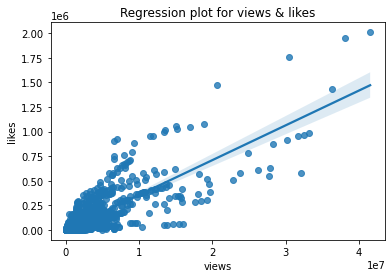

In [ ]:
sns.regplot(data=videos,x='views',y='likes')
plt.title('Regression plot for views & likes')

Text(0.5, 1.0, 'Regression plot for views & dislikes')

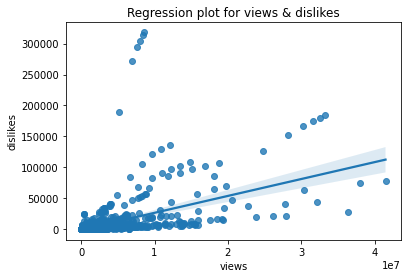

In [ ]:
sns.regplot(data=videos,x='views',y='dislikes')
plt.title('Regression plot for views & dislikes')

In [ ]:
df_corr=videos[['views','likes','dislikes']]
df_corr.corr()

,views,likes,dislikes
views,1.000000,0.832844,0.541955
likes,0.832844,1.000000,0.497439
dislikes,0.541955,0.497439,1.000000


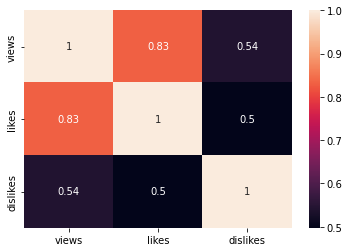

In [ ]:
sns.heatmap(df_corr.corr(),annot=True)

In [ ]:
pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 240 kB 6.5 MB/s 
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=9da0da7d438a438571e9bd890785a33ef98b3c899b157c287e478b6f0b7f32eb
  Stored in directory: /root/.cache/pip/wheels/86/62/9e/a6b27a681abcde69970dbc0326ff51955f3beac72f15696984
Successfully built emoji


In [ ]:
import emoji
comment=comments['comment_text'][1]
[c for c in comment if c in emoji.distinct_emoji_list(comment)]

[]

In [ ]:
str=''
for i in comments['comment_text']:
    list=[c for c in i if c in emoji.distinct_emoji_list(c)]
    for ele in list:
        str=str+ele

In [ ]:
len(str)

59331

In [ ]:
result={}
for i in set(str):
    result[i]=str.count(i)
result

{'👅': 28,
 '🍦': 3,
 '🤴': 4,
 '✌': 152,
 '🙀': 15,
 '🙁': 17,
 '☺': 256,
 '🦅': 8,
 '📹': 7,
 '🥀': 4,
 '🖱': 4,
 '👼': 4,
 '🌱': 2,
 '🤓': 22,
 '⭕': 6,
 '📗': 2,
 '🎦': 2,
 '⬇': 2,
 '🦑': 2,
 '👀': 95,
 '😦': 33,
 '🍧': 1,
 '🌓': 1,
 '😭': 1789,
 '📃': 2,
 '🌶': 3,
 '⛸': 2,
 '⛪': 15,
 '👱': 3,
 '💴': 3,
 '〽': 3,
 '🥗': 1,
 '🙍': 3,
 '🛒': 2,
 '🚽': 2,
 '🔑': 1,
 '🅱': 36,
 '🐨': 8,
 '🔵': 2,
 '😟': 25,
 '🔕': 2,
 '📚': 2,
 '🚡': 1,
 '👓': 7,
 '🔊': 15,
 '🍎': 11,
 '🖤': 173,
 '📅': 2,
 '🍱': 2,
 '☃': 4,
 '🥛': 1,
 '💓': 324,
 '🌴': 7,
 '💢': 1,
 '🍖': 2,
 '🍁': 42,
 '📦': 4,
 '👗': 8,
 '🐹': 2,
 '⏱': 1,
 '🐰': 4,
 '🔮': 8,
 '😧': 24,
 '🌷': 12,
 '📽': 2,
 '🐴': 2,
 '🐛': 5,
 '🔫': 25,
 '⚫': 4,
 '🏋': 1,
 '😳': 73,
 '♣': 2,
 '🐏': 2,
 '🎢': 6,
 '💵': 5,
 '♂': 141,
 '💚': 286,
 '📞': 3,
 '🍿': 2,
 '🕌': 3,
 '◀': 2,
 '🎈': 182,
 '🕷': 5,
 '👌': 656,
 '🌒': 2,
 '🚙': 3,
 '🔽': 2,
 '💳': 3,
 '🔒': 5,
 '💬': 6,
 '🆘': 3,
 '⛵': 4,
 '🌇': 2,
 '🍜': 1,
 '🏼': 549,
 '🌍': 12,
 '🕺': 7,
 '🐘': 5,
 '🐕': 10,
 '👷': 2,
 '🥑': 2,
 '👸': 40,
 '😾': 11,
 '😸': 23,
 '🐺': 3,
 '🍈': 2,
 '👞'

In [ ]:
final={}
for key,value in sorted(result.items(),key =lambda item:item[1]):
    final[key]=value

final

{'🍧': 1,
 '🌓': 1,
 '🥗': 1,
 '🔑': 1,
 '🚡': 1,
 '🥛': 1,
 '💢': 1,
 '⏱': 1,
 '🏋': 1,
 '🍜': 1,
 '🦊': 1,
 '🔞': 1,
 '⛰': 1,
 '🏟': 1,
 '🎗': 1,
 '🔅': 1,
 '↙': 1,
 '✴': 1,
 '🅿': 1,
 '🌔': 1,
 '🤵': 1,
 'ℹ': 1,
 '🥋': 1,
 '🍳': 1,
 '🌾': 1,
 '🖥': 1,
 '⛩': 1,
 '⚒': 1,
 '🏣': 1,
 '🏝': 1,
 '⚰': 1,
 '🤖': 1,
 '⌨': 1,
 '🌁': 1,
 '🛤': 1,
 '🥒': 1,
 '🌗': 1,
 '🌕': 1,
 '🗻': 1,
 '💹': 1,
 '🕰': 1,
 '🍬': 1,
 '✡': 1,
 '🔙': 1,
 '🍤': 1,
 '☘': 1,
 '🌵': 1,
 '🖼': 1,
 '🗝': 1,
 '🍅': 1,
 '🏪': 1,
 '🤨': 1,
 '⏫': 1,
 '🏰': 1,
 '🥉': 1,
 '🥊': 1,
 '🌲': 1,
 '⁉': 1,
 '🥙': 1,
 '🆙': 1,
 '♠': 1,
 '🥈': 1,
 '💲': 1,
 '🖊': 1,
 '🐿': 1,
 '🦎': 1,
 '☔': 1,
 '🏬': 1,
 '🏨': 1,
 '♍': 1,
 '🏛': 1,
 '🌳': 1,
 '🚩': 1,
 '♦': 1,
 '🍹': 1,
 '🦉': 1,
 '🚝': 1,
 '🏵': 1,
 '⤵': 1,
 '♓': 1,
 '🌖': 1,
 '🚤': 1,
 '🌱': 2,
 '📗': 2,
 '🎦': 2,
 '⬇': 2,
 '🦑': 2,
 '📃': 2,
 '⛸': 2,
 '🛒': 2,
 '🚽': 2,
 '🔵': 2,
 '🔕': 2,
 '📚': 2,
 '📅': 2,
 '🍱': 2,
 '🍖': 2,
 '🐹': 2,
 '📽': 2,
 '🐴': 2,
 '♣': 2,
 '🐏': 2,
 '🍿': 2,
 '◀': 2,
 '🌒': 2,
 '🔽': 2,
 '🌇': 2,
 '👷': 2,
 '🥑': 2,
 '🍈': 2,
 '〰': 2,
 

In [ ]:
keys=[*final.keys()]

keys

['🍧',
 '🌓',
 '🥗',
 '🔑',
 '🚡',
 '🥛',
 '💢',
 '⏱',
 '🏋',
 '🍜',
 '🦊',
 '🔞',
 '⛰',
 '🏟',
 '🎗',
 '🔅',
 '↙',
 '✴',
 '🅿',
 '🌔',
 '🤵',
 'ℹ',
 '🥋',
 '🍳',
 '🌾',
 '🖥',
 '⛩',
 '⚒',
 '🏣',
 '🏝',
 '⚰',
 '🤖',
 '⌨',
 '🌁',
 '🛤',
 '🥒',
 '🌗',
 '🌕',
 '🗻',
 '💹',
 '🕰',
 '🍬',
 '✡',
 '🔙',
 '🍤',
 '☘',
 '🌵',
 '🖼',
 '🗝',
 '🍅',
 '🏪',
 '🤨',
 '⏫',
 '🏰',
 '🥉',
 '🥊',
 '🌲',
 '⁉',
 '🥙',
 '🆙',
 '♠',
 '🥈',
 '💲',
 '🖊',
 '🐿',
 '🦎',
 '☔',
 '🏬',
 '🏨',
 '♍',
 '🏛',
 '🌳',
 '🚩',
 '♦',
 '🍹',
 '🦉',
 '🚝',
 '🏵',
 '⤵',
 '♓',
 '🌖',
 '🚤',
 '🌱',
 '📗',
 '🎦',
 '⬇',
 '🦑',
 '📃',
 '⛸',
 '🛒',
 '🚽',
 '🔵',
 '🔕',
 '📚',
 '📅',
 '🍱',
 '🍖',
 '🐹',
 '📽',
 '🐴',
 '♣',
 '🐏',
 '🍿',
 '◀',
 '🌒',
 '🔽',
 '🌇',
 '👷',
 '🥑',
 '🍈',
 '〰',
 '🔋',
 '🎄',
 '📪',
 '🌠',
 '🖖',
 '📫',
 '🚂',
 '🔬',
 '📠',
 '⚔',
 '🕸',
 '📎',
 '🐮',
 '📨',
 '🌑',
 '🔰',
 '📔',
 '✈',
 '👴',
 '🚔',
 '📒',
 '📸',
 '🌆',
 '🆒',
 '📻',
 '🌜',
 '💱',
 '⛺',
 '🦁',
 '🐷',
 '💡',
 '🐵',
 '📮',
 '🚑',
 '📡',
 '📜',
 '🐋',
 '💒',
 '📄',
 '🐗',
 '📣',
 '🐧',
 '📖',
 '🌛',
 '💾',
 '📂',
 '📇',
 '🐽',
 '⛳',
 '☢',
 '🐁',
 '🍝',
 '📛',
 '📟',
 '🎲',
 '🎰'

In [ ]:
values=[*final.values()]

values

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,


In [ ]:
df=pd.DataFrame({'chars':keys[-20:],'num':values[-20:]})

df

,chars,num
0,🤣,498
1,😁,515
2,🏼,549
3,👌,656
4,💜,724
5,😊,755
6,♥,767
7,💖,777
8,🏻,798
9,😮,820


In [ ]:
import plotly.graph_objs as go
from plotly.offline import iplot

trace=go.Bar(
x=df['chars'],
y=df['num']
)

iplot([trace])

In [ ]:
#We will look at videos with top 100 views
videos_top_100_views = videos.nlargest(100, 'views')
videos_top_100_views.shape

(100, 11)

In [ ]:
#Let us take a look at the top 10 videos with the most views
videos_top_100_views.sort_values('views', ascending = False).head(10)

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
1907,MBdVXkSdhwU,BTS (방탄소년단) 'DNA' Official MV,ibighit,10,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,41500672,2010366,78076,736179,https://i.ytimg.com/vi/MBdVXkSdhwU/default.jpg,22.09
1694,MBdVXkSdhwU,BTS (방탄소년단) 'DNA' Official MV,ibighit,10,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,38013692,1950475,75294,713293,https://i.ytimg.com/vi/MBdVXkSdhwU/default.jpg,21.09
177,tt2k8PGm-TI,ZAYN - Dusk Till Dawn ft. Sia,ZaynVEVO,10,Dusk Till Dawn|Pop|RCA Records Label|ZAYN feat...,36323498,1431683,28049,100661,https://i.ytimg.com/vi/tt2k8PGm-TI/default.jpg,13.09
7135,LunHybOKIjU,Eminem Rips Donald Trump In BET Hip Hop Awards...,BETNetworks,24,BET|BET Networks|BET Music|Black Entertainment...,33191594,982842,184310,337603,https://i.ytimg.com/vi/LunHybOKIjU/default.jpg,18.10
6917,LunHybOKIjU,Eminem Rips Donald Trump In BET Hip Hop Awards...,BETNetworks,24,BET|BET Networks|BET Music|Black Entertainment...,32512343,968719,180427,332396,https://i.ytimg.com/vi/LunHybOKIjU/default.jpg,17.10
1995,SHq2qrFUlGY,Shakira - Perro Fiel (Official Video) ft. Nick...,shakiraVEVO,10,Shakira ft. Nicky Jam|Shakira ft. Nicky Jam Mu...,32136948,578266,43475,40071,https://i.ytimg.com/vi/SHq2qrFUlGY/default.jpg,22.09
6672,LunHybOKIjU,Eminem Rips Donald Trump In BET Hip Hop Awards...,BETNetworks,24,BET|BET Networks|BET Music|Black Entertainment...,31636010,950353,175483,327345,https://i.ytimg.com/vi/LunHybOKIjU/default.jpg,16.10
1440,MBdVXkSdhwU,BTS (방탄소년단) 'DNA' Official MV,ibighit,10,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,30424471,1762428,63990,582624,https://i.ytimg.com/vi/MBdVXkSdhwU/default.jpg,20.09
6431,LunHybOKIjU,Eminem Rips Donald Trump In BET Hip Hop Awards...,BETNetworks,24,BET|BET Networks|BET Music|Black Entertainment...,30224787,916296,166986,314704,https://i.ytimg.com/vi/LunHybOKIjU/default.jpg,15.10
6204,LunHybOKIjU,Eminem Rips Donald Trump In BET Hip Hop Awards...,BETNetworks,24,BET|BET Networks|BET Music|Black Entertainment...,28212358,870122,153018,296958,https://i.ytimg.com/vi/LunHybOKIjU/default.jpg,14.10


In [ ]:
#we will join the top_100 videos with the commnents table
videos_top_100_with_comments = videos_top_100_views.merge(comments,how = 'left', on = 'video_id', suffixes = ['_video', '_comment'])
videos_top_100_with_comments.head()

,video_id,title,channel_title,category_id,tags,views,likes_video,dislikes,comment_total,thumbnail_link,date,comment_text,likes_comment,replies,polarity
0,MBdVXkSdhwU,BTS (방탄소년단) 'DNA' Official MV,ibighit,10,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,41500672,2010366,78076,736179,https://i.ytimg.com/vi/MBdVXkSdhwU/default.jpg,22.09,"I'm crying, this got over 20 million views <3",0,0,0.400000
1,MBdVXkSdhwU,BTS (방탄소년단) 'DNA' Official MV,ibighit,10,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,41500672,2010366,78076,736179,https://i.ytimg.com/vi/MBdVXkSdhwU/default.jpg,22.09,It's 3am here got an hour left. It's ok if we ...,0,0,0.321528
2,MBdVXkSdhwU,BTS (방탄소년단) 'DNA' Official MV,ibighit,10,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,41500672,2010366,78076,736179,https://i.ytimg.com/vi/MBdVXkSdhwU/default.jpg,22.09,......I have replayed this MV ....too much and...,0,0,-0.212500
3,MBdVXkSdhwU,BTS (방탄소년단) 'DNA' Official MV,ibighit,10,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,41500672,2010366,78076,736179,https://i.ytimg.com/vi/MBdVXkSdhwU/default.jpg,22.09,fam we can break DESPACITO record if we manage...,0,0,0.050000
4,MBdVXkSdhwU,BTS (방탄소년단) 'DNA' Official MV,ibighit,10,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,41500672,2010366,78076,736179,https://i.ytimg.com/vi/MBdVXkSdhwU/default.jpg,22.09,can someone tell me the likes now?,0,0,0.000000


In [ ]:
sentiment = []
for comment in videos_top_100_with_comments['comment_text']:
    try:
        sentiment.append(TextBlob(comment).sentiment.polarity)
    except:
        sentiment.append(0)

#input sentiment for each comment
videos_top_100_with_comments['sentiment'] = sentiment

videos_top_100_with_comments.head()

,video_id,title,channel_title,category_id,tags,views,likes_video,dislikes,comment_total,thumbnail_link,date,comment_text,likes_comment,replies,polarity,sentiment
0,MBdVXkSdhwU,BTS (방탄소년단) 'DNA' Official MV,ibighit,10,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,41500672,2010366,78076,736179,https://i.ytimg.com/vi/MBdVXkSdhwU/default.jpg,22.09,"I'm crying, this got over 20 million views <3",0,0,0.400000,0.400000
1,MBdVXkSdhwU,BTS (방탄소년단) 'DNA' Official MV,ibighit,10,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,41500672,2010366,78076,736179,https://i.ytimg.com/vi/MBdVXkSdhwU/default.jpg,22.09,It's 3am here got an hour left. It's ok if we ...,0,0,0.321528,0.321528
2,MBdVXkSdhwU,BTS (방탄소년단) 'DNA' Official MV,ibighit,10,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,41500672,2010366,78076,736179,https://i.ytimg.com/vi/MBdVXkSdhwU/default.jpg,22.09,......I have replayed this MV ....too much and...,0,0,-0.212500,-0.212500
3,MBdVXkSdhwU,BTS (방탄소년단) 'DNA' Official MV,ibighit,10,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,41500672,2010366,78076,736179,https://i.ytimg.com/vi/MBdVXkSdhwU/default.jpg,22.09,fam we can break DESPACITO record if we manage...,0,0,0.050000,0.050000
4,MBdVXkSdhwU,BTS (방탄소년단) 'DNA' Official MV,ibighit,10,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,41500672,2010366,78076,736179,https://i.ytimg.com/vi/MBdVXkSdhwU/default.jpg,22.09,can someone tell me the likes now?,0,0,0.000000,0.000000


In [ ]:
grouped_by_videos = videos_top_100_with_comments.groupby('video_id').agg({'views' : 'mean', 'sentiment':'mean', 'likes_video' : 'mean'})
grouped_by_videos.head()

,views,sentiment,likes_video
video_id,,,
1NyMSWqIJDQ,1.023587e+07,0.00000,343985.500000
3y5A4paFOb4,1.424192e+07,0.00000,996757.666667
5ggZ9jIHnr8,1.221788e+07,0.00000,562234.400000
8ndhidEmUbI,9.234157e+06,0.05322,67909.250000
APHgDFRpCi0,1.145494e+07,0.00000,401417.200000


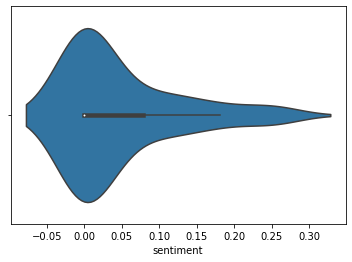

In [ ]:
sns.violinplot(data = grouped_by_videos, x = 'sentiment')

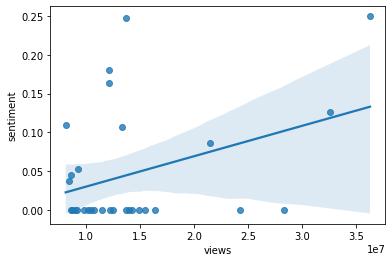

In [ ]:
sns.regplot(data = grouped_by_videos, x = 'views', y = 'sentiment')
plt.show()

In [ ]:
grouped_by_videos['views'].corr(grouped_by_videos['sentiment'])

0.37006409024512654

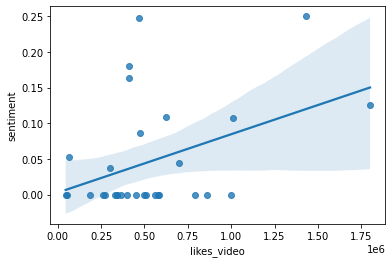

In [ ]:
sns.regplot(data = grouped_by_videos, x = 'likes_video', y = 'sentiment')

In [ ]:
grouped_by_videos['likes_video'].corr(grouped_by_videos['sentiment'])

0.4099918950139745